In [1]:
%cd yolov5

E:\sugarcane_bud_classification\yolov5


C:\Users\smsan\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pathlib
import sys
import os
import cv2
import torch
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

In [3]:
if sys.platform != "win32":
    pathlib.WindowsPath = pathlib.PosixPath

# Load YOLOv5 model
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='E:\\sugarcane_bud_classification\\best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\smsan/.cache\torch\hub\master.zip
YOLOv5  2025-6-6 Python-3.12.6 torch-2.4.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
def detect_and_show_bud_crops(image_path):
    img_pil = Image.open(image_path)
    img_cv2 = cv2.imread(image_path)
    img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

    results = yolo_model(img_pil)
    detections = results.pandas().xyxy[0]

    for i, row in detections.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])

        # Crop and resize the region
        crop = img_cv2_rgb[y1:y2, x1:x2]
        crop_resized = cv2.resize(crop, (224, 224))

        # Draw bounding box on original image
        img_with_box = img_cv2_rgb.copy()
        cv2.rectangle(img_with_box, (x1, y1), (x2, y2), (0, 255, 0), 3)

        # Create a figure with 2 subplots
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img_with_box)
        axes[0].set_title("Input Image with Detection")
        axes[0].axis('off')

        axes[1].imshow(crop_resized)
        axes[1].set_title("Cropped Bud")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()  # Only show once

        # Avoid returning or leaving the plot object at the end to suppress auto display
        plt.close(fig)


In [5]:
%matplotlib inline

C:\Users\smsan/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


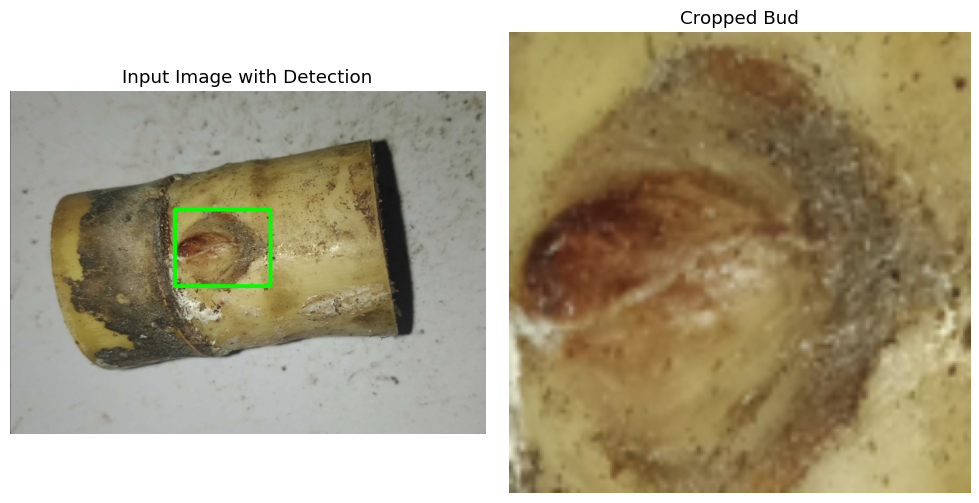

In [24]:
detect_and_show_bud_crops(r"E:\sugarcane_bud_classification\grade3\Picture1.png")